
# Heart Disease - EDA and Model Training

## 1. Introduction

### 1.1 About Dataset

The dataset is the refined Cleveland Heart Disease dataset taken from the [Kaggle](https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland) repository. The dataset consists of 303 individuals’ data. There are 14 columns in the dataset(which have been extracted from a larger set of 75). No missing values. The classification task is to predict whether an individual is suffering from heart disease or not. (0: absence, 1: presence).

Link to dataset: https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland

Complete Attributes Description:
*   age - Age of the patient
*   sex - Sex of the patient
*   cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
*   trtbps - Resting blood pressure (in mm Hg)
*   chol - Cholestoral in mg/dl fetched via BMI sensor
*   fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
*   restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
*   thalachh - Maximum heart rate achieved
*   oldpeak - Previous peak
*   slp - Slope
*   caa - Number of major vessels
*   thall - Thalium Stress Test result ~ (0,3)
*   exng - Exercise induced angina ~ 1 = Yes, 0 = No
*   output - Target variable

### 1.2 Work Ahead

We have conducted thorough EDA over the refined heart disease dataset to figure out the importance of each attribute, and then have trained a few models to find out the model with most accuracy over the said dataset.

## 2. Explorator Data Analysis

### 2.1 Exploration

In [27]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [28]:
df = pd.read_csv("heart.csv")   # loading dataset

In [29]:
print("The shape of the dataset is : ", df.shape) # getting shape of dataset

The shape of the dataset is :  (303, 14)


In [30]:
df.head() # first five rows

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
# number f unique values of each attribute
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [32]:
# Separating the categorical, continuos and target data
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [33]:
# statistical summary of continuous attributes
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [34]:
df.isnull().sum()   # number of missing values for each attributes

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### 2.2 Analysis

#### 2.2.1 Count Plots

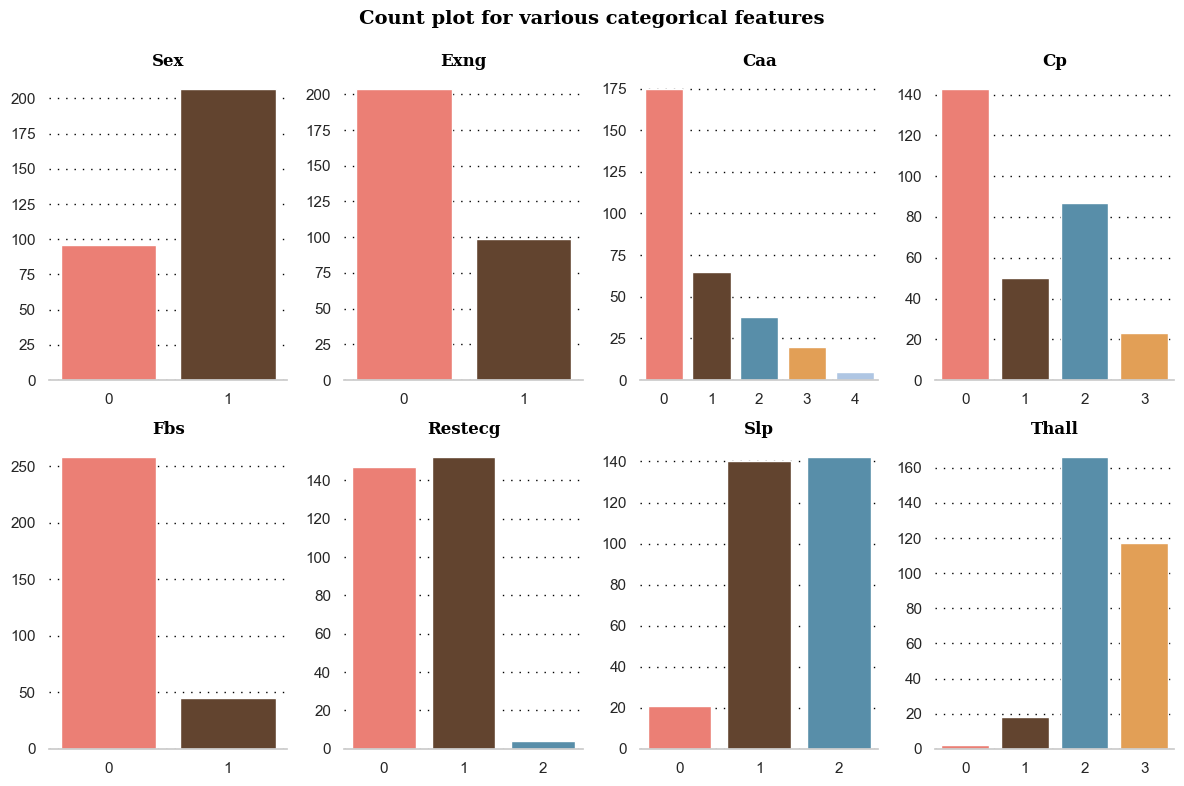

In [35]:
# Count plot for categorical data

# Define a visually beautiful color palette
color_palette = ['#FF6F61', '#6B4226', '#4A92B7', '#F9A03F', '#A7C5EB']

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 8))

# Flatten the axes for easy iteration
axes = axes.flatten()

# List of categorical attributes
attributes = cat_cols

# Loop through attributes and create count plots
for ax, attribute in zip(axes, attributes):
    sns.countplot(ax=ax, data=df, x=attribute, palette=color_palette)

    # Set title and remove unnecessary elements
    ax.set_title(attribute.capitalize(), fontsize=12, fontweight='bold', fontfamily='serif', color="#000000")
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax.set_xlabel("")
    ax.set_ylabel("")

    # Remove spines
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

# Adjust layout
plt.tight_layout()

# Title of the plot
plt.suptitle('Count plot for various categorical features', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

# Remove unnecessary elements from the main title
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()

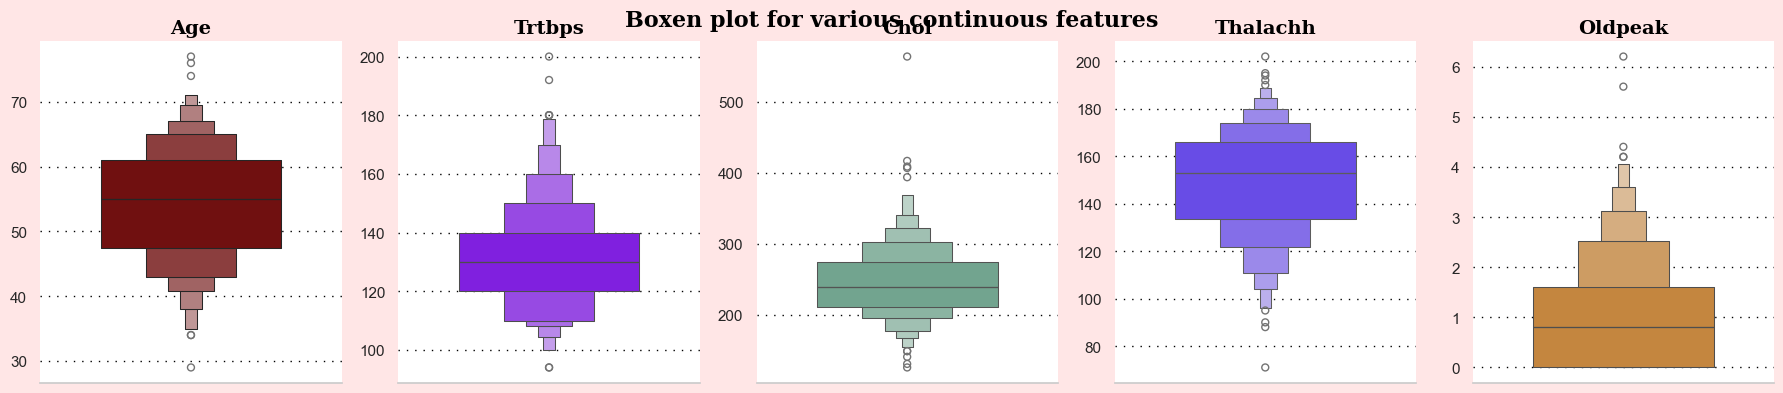

In [36]:
# Boxen plot for continuous data

# Define a visually beautiful color palette
color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(1,5, figsize=(18, 4))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Set the background color
background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color)

# List of continuous features
continuous_features = con_cols

# Loop through features and create boxen plots
for ax, feature, color in zip(axes, continuous_features, color_palette):
    sns.boxenplot(ax=ax, y=df[feature], palette=[color], width=0.6)

    # Set title and remove unnecessary elements
    ax.set_title(feature.capitalize(), fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
    ax.set_xlabel("")
    ax.set_ylabel("")

    # Remove spines
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

# Adjust layout
plt.tight_layout()

# Title of the plot
plt.suptitle('Boxen plot for various continuous features', fontsize=16, fontweight='bold', fontfamily='serif', color="#000000")

# Remove unnecessary elements from the main title
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()

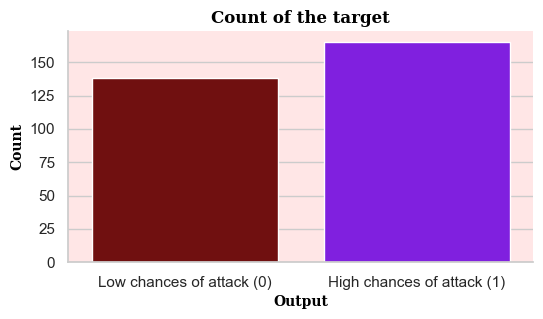

In [37]:
# Count plot for target data

import matplotlib.pyplot as plt
import seaborn as sns

# Define a visually beautiful color palette
color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]

# Create a count plot
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='output', palette=color_palette)

# Set background color
background_color = "#ffe6e6"
plt.gca().set_facecolor(background_color)

# Set title and labels
plt.title('Count of the target', fontsize=12, fontweight='bold', fontfamily='serif', color="#000000")
plt.xlabel('Output', fontsize=10, fontweight='bold', fontfamily='serif', color="#000000")
plt.ylabel('Count', fontsize=10, fontweight='bold', fontfamily='serif', color="#000000")
plt.xticks([0, 1], ['Low chances of attack (0)', 'High chances of attack (1)'], rotation=0)

# Remove spines
sns.despine()

# Show the plot
plt.show()

#### 2.2.2 Correlation Matrix

In [38]:
# Correlation matrix of continuous features
df_corr = df[con_cols].corr().transpose()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


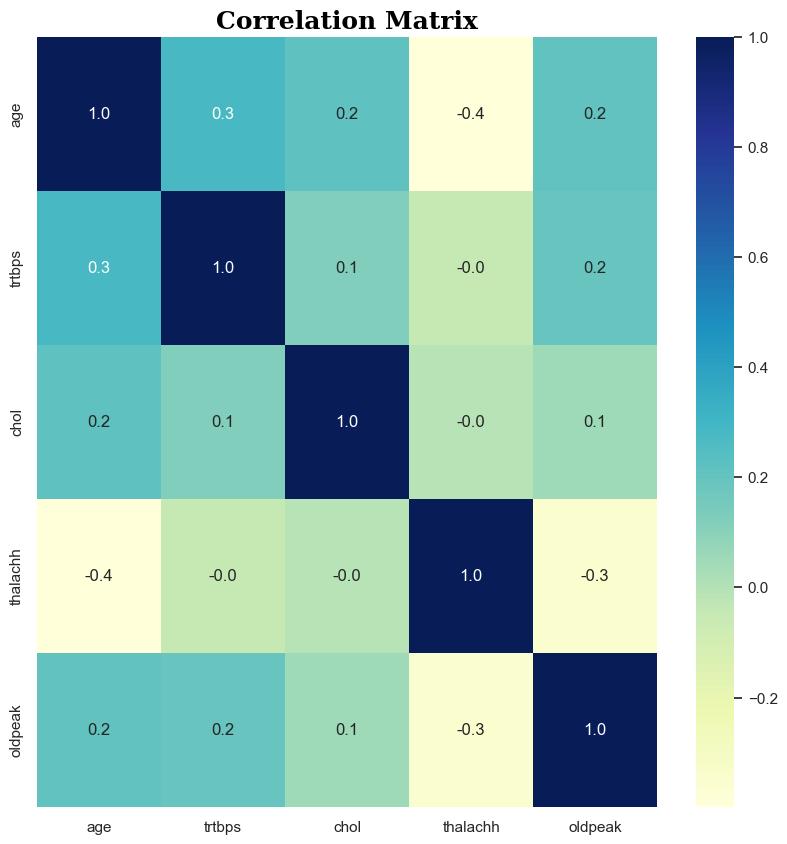

In [39]:
# Heatmap of continuous features / correlation matrix

# Create a correlation matrix plot
plt.figure(figsize=(10, 10))

# Title
plt.title('Correlation Matrix', fontsize=18, fontweight='bold', fontfamily='serif', color="#000000")

# Create a correlation matrix
df_corr = df[con_cols].corr()

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(df_corr))

# Plot the heatmap
sns.heatmap(df_corr, fmt=".1f", annot=True, cmap='YlGnBu')

# Show the plot
plt.show()


#### 2.2.3 Relation of features w.r.t. the target feature

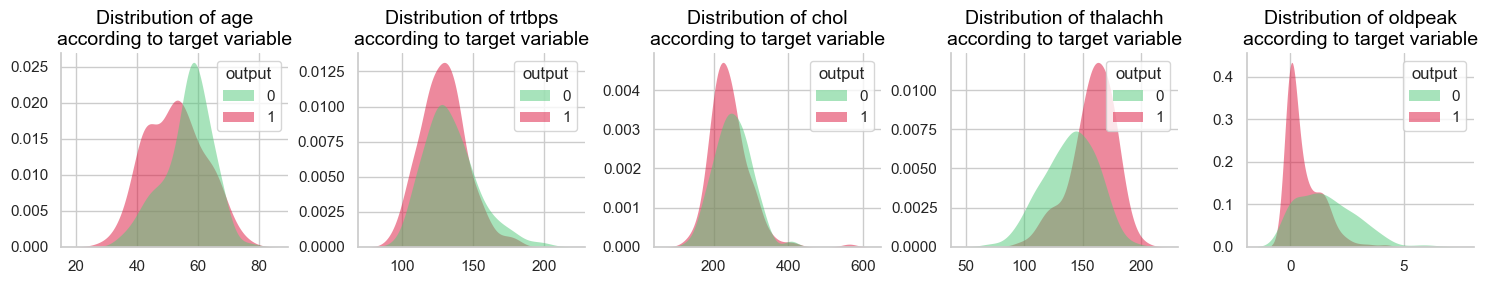

In [40]:
# Relation of continuos features with target data

# Set up the 5x2 grid of subplots
fig, axes = plt.subplots(1,5, figsize=(15, 3))
fig.patch.set_facecolor("white")

# Define continuous features
continuous_features = con_cols

# Define color palette
color_palette = ["#50C878", "#DC143C"]

# Loop through features and create distribution plots
for ax, feature in zip(axes.flatten(), continuous_features):
    sns.kdeplot(data=df, x=feature, hue="output", fill=True, palette=color_palette, alpha=.5, linewidth=0, ax=ax)

    # Set title and remove unnecessary elements
    ax.set_title(f'Distribution of {feature}\naccording to target variable', fontsize=14, color='#000000')
    ax.set_xlabel("")
    ax.set_ylabel("")

    # Remove spines and ticks
    sns.despine(ax=ax, top=True, right=True)
    ax.tick_params(left=False, bottom=False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

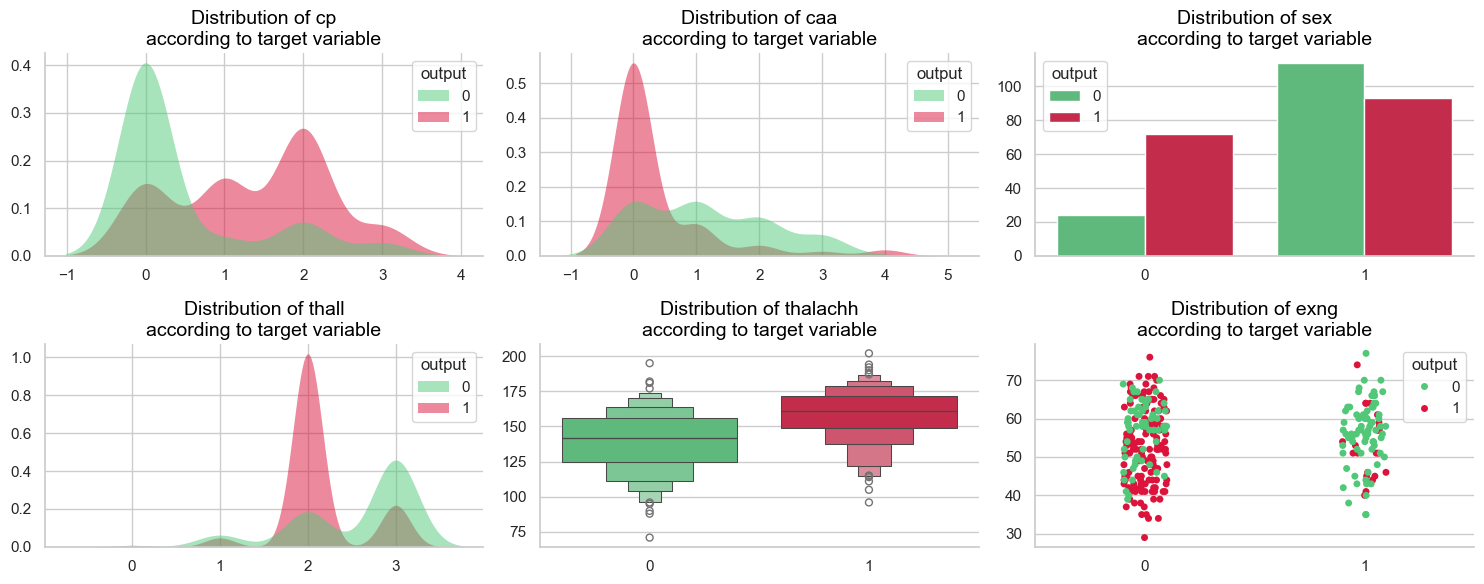

In [41]:
# Other attributes w.r.t the target feature

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15,6))

# Define continuous features
continuous_features = ['cp', 'caa', 'sex', 'thall', 'thalachh', 'exng']

# Loop through features and create plots
for ax, feature in zip(axes.flatten(), continuous_features):
    sns.set(style="whitegrid")  # Set the style for each subplot

    # Add a title to each subplot
    ax.set_title(f'Distribution of {feature}\naccording to target variable', fontsize=14, color='#000000')

    # Plot the distribution or count based on the feature and target variable
    if feature == 'sex':
        sns.countplot(ax=ax, data=df, x=feature, hue='output', palette=["#50C878", "#DC143C"])
    elif feature == 'thalachh':
        sns.boxenplot(ax=ax, data=df, x='output', y=feature, palette=["#50C878", "#DC143C"])
    elif feature == 'exng':
        sns.stripplot(ax=ax, data=df, x=feature, y='age', hue='output', palette=["#50C878", "#DC143C"])
    else:
        sns.kdeplot(ax=ax, data=df, x=feature, hue="output", fill=True, palette=["#50C878", "#DC143C"], alpha=.5, linewidth=0)

    # Remove unnecessary elements
    ax.set_xlabel("")
    ax.set_ylabel("")

    # Remove spines and ticks
    sns.despine(ax=ax, top=True, right=True)
    ax.tick_params(left=False, bottom=False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

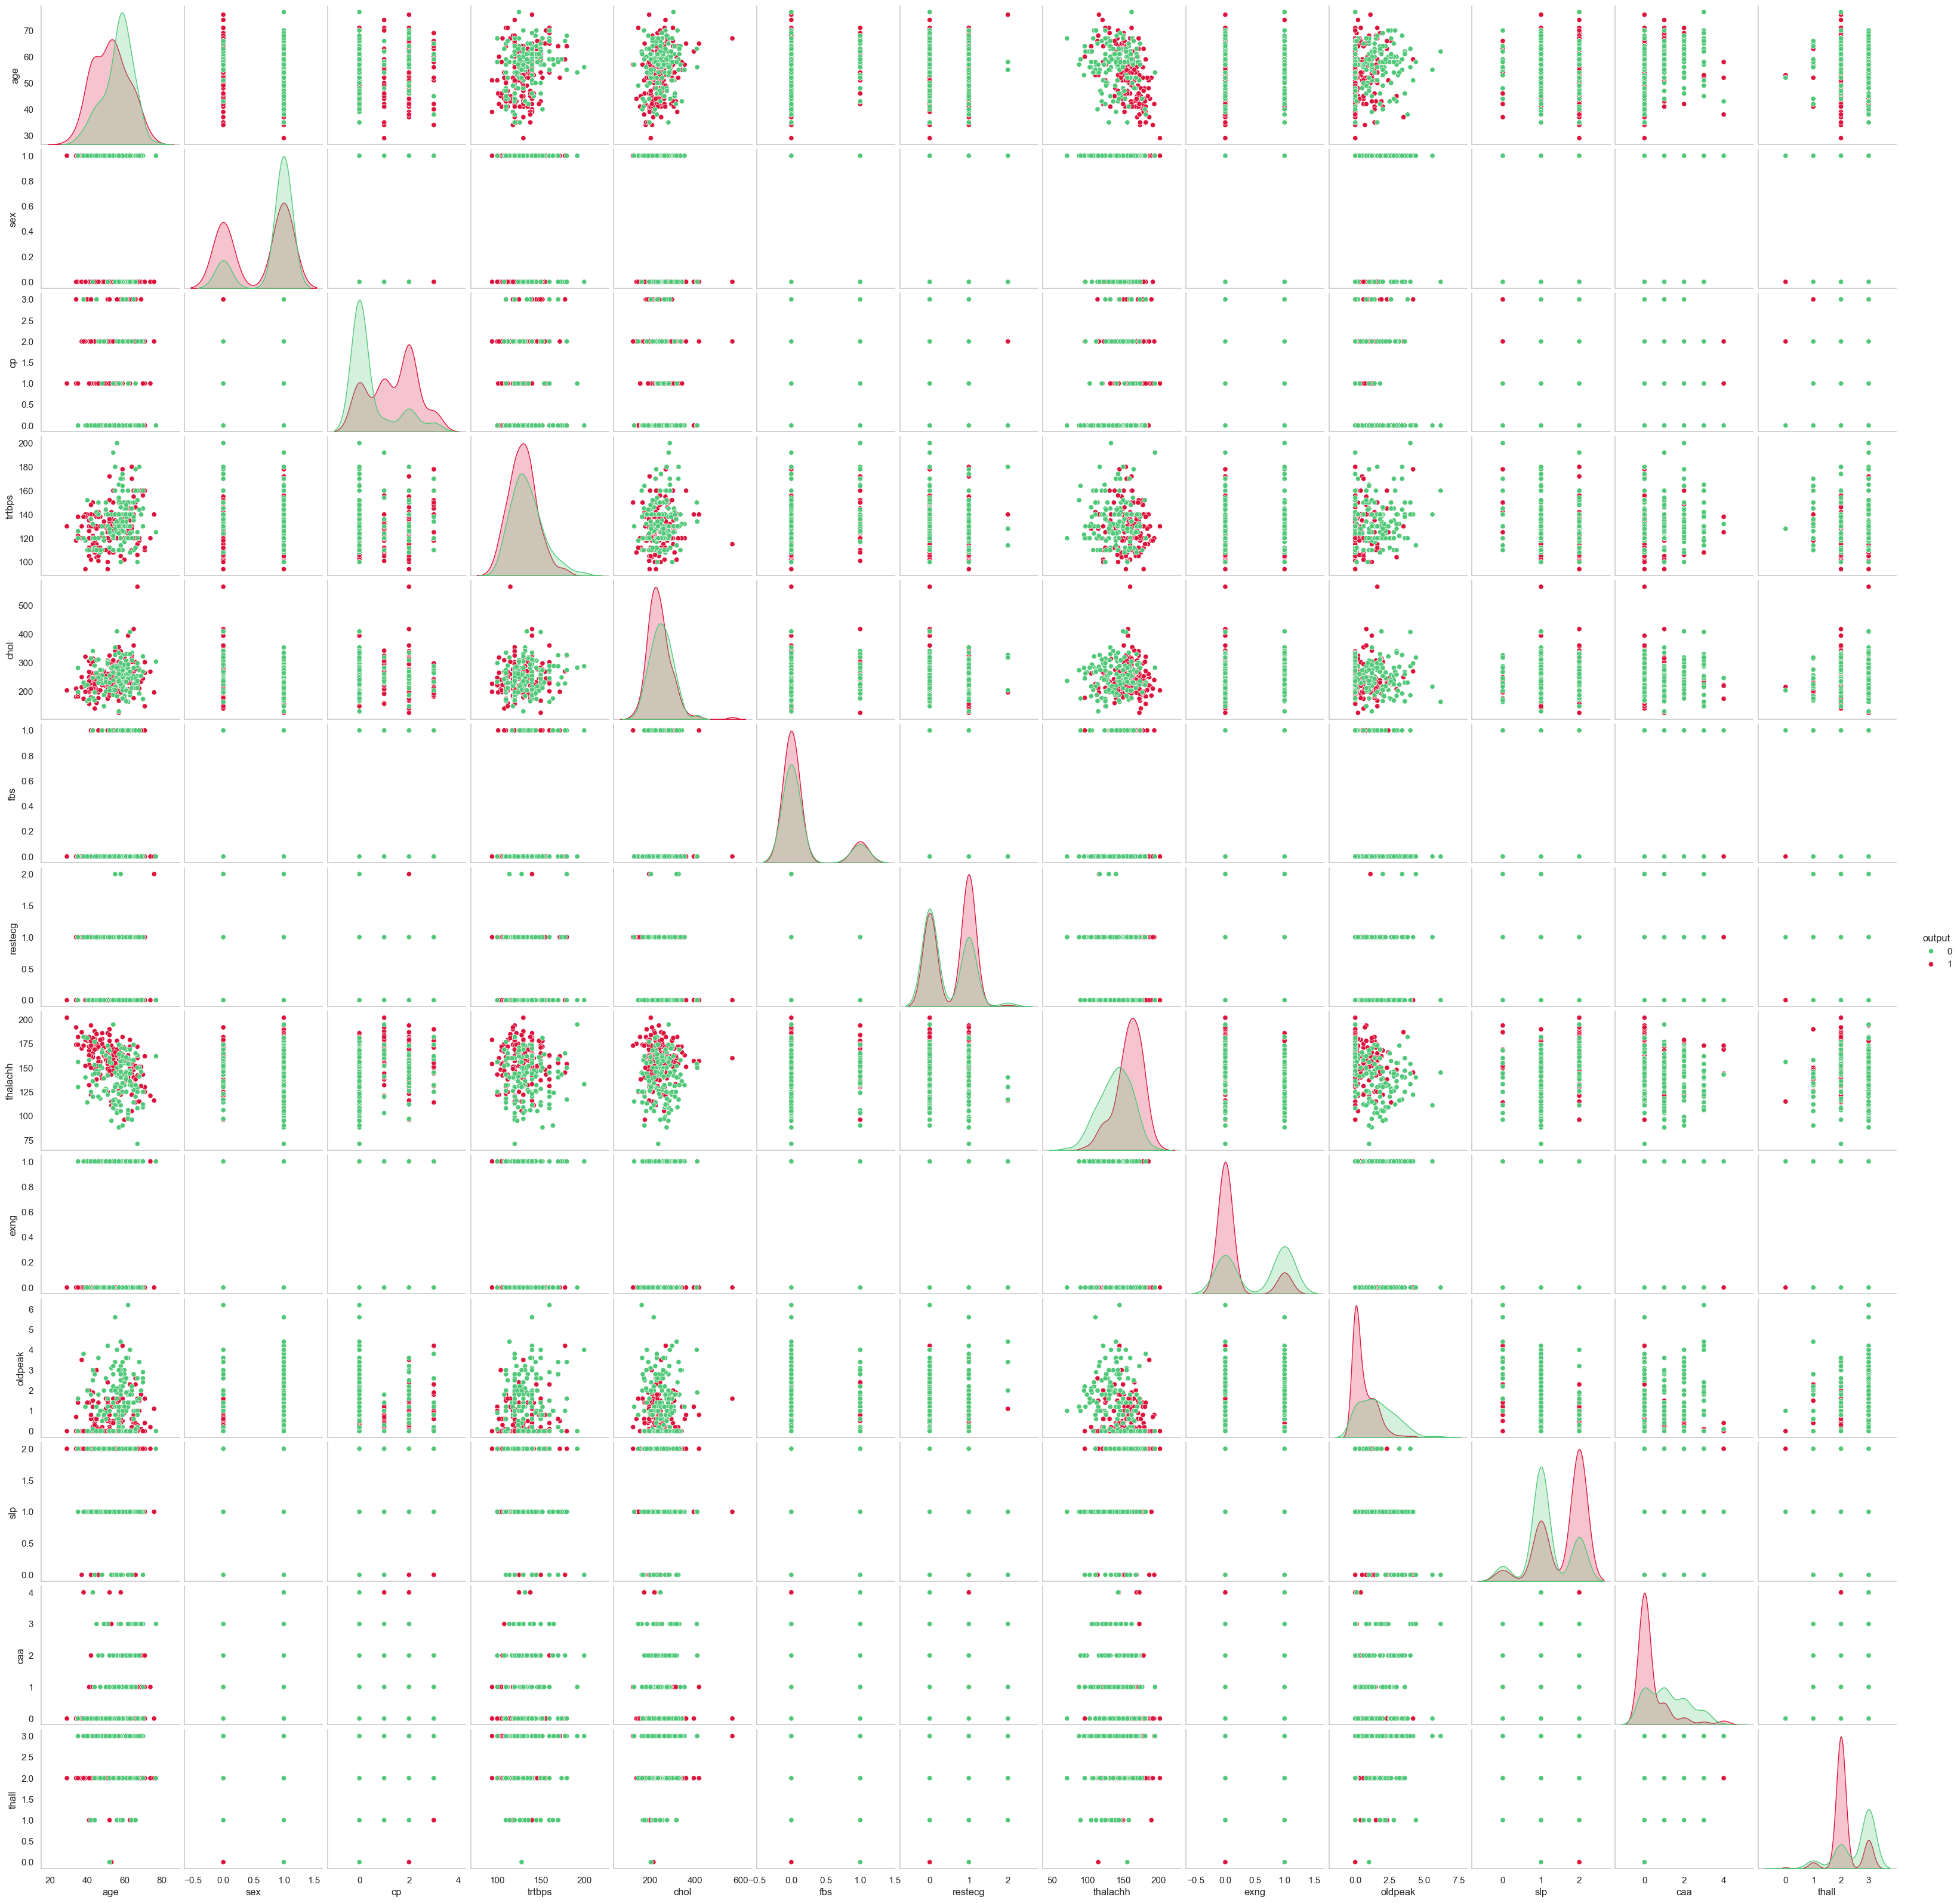

In [42]:
# pairplot without grid lines

# Set the style to whitegrid
sns.set(style="whitegrid")

# pairplot without grid lines
pair_plot = sns.pairplot(df, hue='output', palette=["#50C878", "#DC143C"])

# Remove grid lines by iterating through each subplot
for ax in pair_plot.axes.flatten():
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

plt.show()

#### 2.2.4 Conclusions of EDA

1. The dataset does not contain any missing values (NaN).

2. Outliers are observed in all continuous features.

3. There is a significant imbalance in the distribution of sex, with more than twice the number of individuals with sex = 1 compared to sex = 0.

4. The heatmap indicates no clear linear correlation among continuous variables.

5. The scatterplot heatmap matrix suggests potential correlations between output and certain features such as cp, thalachh, and slp.

6. Contrary to intuition, the distribution plot of age with respect to output does not show a straightforward correlation with increased age and heart attack risk.

7. Individuals with higher maximum heart rates (thalachh) tend to have a higher likelihood of a heart attack, as indicated by the distribution plot.

8. Lower values of the previous peak (oldpeak) are associated with a higher chance of a heart attack, according to the distribution plot.

9. Key observations from plot 3.2.4 include:
  *   Non-Anginal chest pain (cp = 2) is linked to a higher likelihood of a heart attack.
  *   Individuals with no major vessels (caa = 0) have an elevated risk of heart attack.
  *   Males (sex = 1) show a higher probability of experiencing a heart attack.
  *   Thallium Stress Test result (thall = 2) is associated with a significantly increased chance of a heart attack.
  *   Individuals with no exercise-induced angina (exng = 0) exhibit a higher probability of a heart attack.

## 3. Model Training

### 3.1 Importing necessary packages

In [43]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print('Packages imported...')

Packages imported...


### 3.2 Making features model ready

#### 3.2.1 SCALING AND ENCODING FEATURES

In [44]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()



The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,True,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
1,-1.333333,0.00,0.157480,1.046154,1.6875,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,-1.037037,0.00,-0.566929,0.584615,0.3750,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0.074074,-0.50,-0.062992,0.769231,0.0000,True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,0.148148,-0.50,1.795276,0.307692,-0.1250,False,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False


#### 3.2.2 Train-Test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


### 3.3 Model Building (Linear Classifier)

#### 3.3.1 SUPPORT VECTOR MACHINES

In [46]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8688524590163934


#### 3.3.2 Logistic Regression

In [47]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.9016393442622951


#### 3.3.3 HYPERPARAMETER TUNING OF SVC

In [48]:
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The best params are : {'C': 3, 'gamma': 0.1}
The best score is   : 0.8384353741496599
The test accuracy score of SVM after hyper-parameter tuning is  0.9016393442622951


#### 3.3.4 ROC Curve

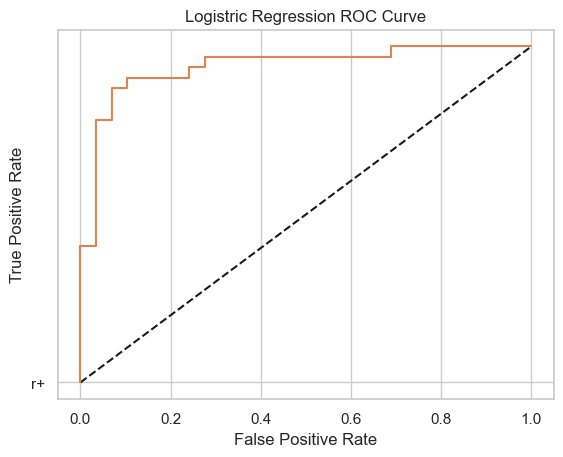

In [49]:
# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

### 3.4 Model Building (Tree Models)

#### 3.4.1 Decision Tree

In [50]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7868852459016393


#### 3.4.2 Random Forest

In [51]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = rf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.819672131147541


#### 3.4.3 Gradient Boosting Classifier

In [52]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Gradient Boosting Classifier is  0.8688524590163934


### 3.5 Conclusions of Model Training

#### Linear Classifiers:
1. Support Vector Machines (SVM)
  * A Support Vector Machines (SVM) model with a linear kernel has been instantiated and fitted to the training data.
  * The test accuracy score of the SVM model is 0.8689.
2. Hyperparameter Tuning of SVM
  * A grid search for hyperparameter tuning of the SVM model has been conducted, considering various values for "C" and "gamma."
  * The best hyperparameters found are {'C': 3, 'gamma': 0.1}, resulting in a test accuracy score of 0.9016 after tuning.
3. Logistic Regression
  * A Logistic Regression model has been instantiated and fitted to the training data.
  * The test accuracy score of the Logistic Regression model is 0.9016.
4. ROC Curve
  * The Receiver Operating Characteristic (ROC) curve for the Logistic Regression model has been plotted, showing its discrimination performance.

#### Tree Models:
1. Decision Tree
  * A Decision Tree model has been instantiated and fitted to the training data.
  * The test accuracy score of the Decision Tree model is 0.7869.
2. Random Forest
  * A Random Forest model has been instantiated and fitted to the training data.
  * The test accuracy score of the Random Forest model is 0.7869.
3. Gradient Boosting Classifier
  * A Gradient Boosting Classifier model has been instantiated and fitted to the training data.
  * The test accuracy score of the Gradient Boosting Classifier model is 0.8689.

####Summary of Model Results
Linear Classifiers:

* SVM achieved a test accuracy score of 0.8689, and after hyperparameter tuning, the score improved to 0.9016.
* Logistic Regression achieved a test accuracy score of 0.9016.

Tree Models:

* Decision Tree achieved a test accuracy score of 0.7869.
* Random Forest achieved a test accuracy score of 0.7869.
* Gradient Boosting Classifier achieved a test accuracy score of 0.8689.